## 1) Модель на основе tf-idf и bag of word векторизации

In [0]:
import pandas as pd
import numpy as np
import time
import re

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import MeanAbsoluteError

import nltk
from nltk.corpus import words, wordnet, stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/hsemath2020reviews/'

train_path = data_path + 'train.csv'
test_path = data_path + 'test.csv'
sample_path = data_path + 'sample_submission.csv'

In [0]:
X_train = pd.read_csv(train_path)
X_test = pd.read_csv(test_path)

In [7]:
print('Training set dimension:', X_train.shape)
print('Test set dimension:', X_test.shape)

Training set dimension: (100000, 4)
Test set dimension: (20000, 3)


In [8]:
! pip install nlppreprocess

In [0]:
from nlppreprocess import NLP

nlp_preproc = NLP() # correcly removes stopwords ('not' handling), remove numbers and punctuation
max_len = 150

def prep(review):
    #review = re.sub("[^a-zA-Z]", " ", review)
    review = nlp_preproc.process(review)
    review = review.lower()

    #review = lemmatize(review)
    tokens = nltk.word_tokenize(review)
    #tokens = [w for w in tokens if w not in stopwords.words('english')]
    review = [nltk.stem.SnowballStemmer('english').stem(w) for w in tokens]
    review = " ".join(review)
    return review[:max_len] if max_len else review

In [10]:
review = ' Fantastic hotel best I ve stayed in for a while a real 5 experience! Excellent staff nothing to much trouble for them and the concierge on duty every day was first Class '
print(prep(review))

fantast hotel best ve stay in real experi excel staff noth much troubl them and concierg duti everi day first class


In [11]:
print(X_train['negative'].iloc[:2].apply(prep).iloc[0])
X_train['negative'].iloc[0]

there issu with wifi connect


' There were issues with the wifi connection'

In [0]:
X_train['clean_positive'] = X_train['positive'].apply(prep)
X_train['clean_negative'] = X_train['negative'].apply(prep)

In [0]:
X_test['clean_positive'] = X_test['positive'].apply(prep)
X_test['clean_negative'] = X_test['negative'].apply(prep)

In [0]:
X_train['clean_concat'] = X_train["clean_positive"] + " " + X_train["clean_negative"]
X_test['clean_concat'] = X_test["clean_positive"] + " " + X_test["clean_negative"]

In [15]:
X_train.head()

,review_id,negative,positive,score,clean_positive,clean_negative,clean_concat
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1,no posit,there issu with wifi connect,no posit there issu with wifi connect
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5,no posit,tv not work,no posit tv not work
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0,beauti room great locat love staff,more pillow,beauti room great locat love staff more pillow
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4,locat,veri busi,locat veri busi
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7,nice breakfast handi victoria train station an...,room could with bit refurbish could corridor l...,nice breakfast handi victoria train station an...


In [0]:
sentences = np.array(X_train['clean_concat'])
scores = np.array(X_train['score'])
labels = np.array([x/10 for x in scores])
lr_labels = np.array([int(x*10) for x in scores])

sentences_train, sentences_val, sentiments_train, sentiments_val = train_test_split(sentences, lr_labels, test_size=0.1, random_state=4)

In [17]:
print(labels[:10])
print(lr_labels[:10])

[0.71 0.75 1.   0.54 0.67 0.63 0.88 1.   0.92 0.67]
[ 71  75 100  54  67  63  88 100  92  67]


In [0]:
# # build TFIDF features on train reviews
# tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2), sublinear_tf=True)

# tv_train_features = tv.fit_transform(sentences_train)
# tv_val_features = tv.transform(sentences_val)

In [19]:
# lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
# lr.fit(tv_train_features, sentiments_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# lr_tfidf_predictions_val_raw = lr.predict(tv_val_features)

# lr_tfidf_predictions_val = [score/10 for score in lr_tfidf_predictions_val_raw]
# sentiments_val_div = [score/10 for score in sentiments_val]

# print(lr_tfidf_predictions_val[:10])
# print(sentiments_val_div[:10])

[9.6, 9.2, 10.0, 9.6, 10.0, 10.0, 7.5, 10.0, 6.3, 7.5]
[10.0, 8.8, 9.2, 10.0, 10.0, 9.2, 9.2, 7.5, 5.4, 7.9]


In [21]:
# test_sentences = np.array(X_test['clean_concat'])
# tv_test_features = tv.transform(test_sentences)

# predicted_scores_raw = lr.predict(tv_test_features)
# predicted_scores = [score/10 for score in predicted_scores_raw]
# print(predicted_scores[:10])

[4.2, 10.0, 7.1, 7.5, 10.0, 10.0, 10.0, 10.0, 7.5, 10.0]


In [0]:
# sample_df = pd.read_csv(sample_path)
# sample_df['score'] = predicted_scores
# submission_file_name = 'sample_submission_tf_idf.csv'
# sample_df.to_csv(submission_file_name, index=False)

In [23]:
# mae = MeanAbsoluteError()
# print(mae(lr_tfidf_predictions_val, sentiments_val_div).numpy())

1.00199


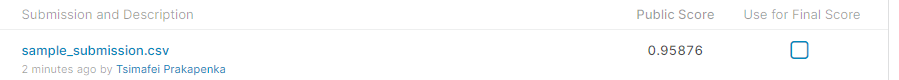

## 2) Оценка с помощью сверточной нейронной сети и предобученного распределенного векторного представления слов.

In [0]:
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Lambda, Conv1D, Dense, Flatten, Input, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dropout, SpatialDropout1D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [0]:
MAX_SEQUENCE_LENGTH = 300
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [0]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train['clean_concat'])
sequences = tokenizer.texts_to_sequences(X_train['clean_concat'])

In [27]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 21762 unique tokens.
Shape of data tensor: (100000, 300)
Shape of label tensor: (100000,)


In [0]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=VALIDATION_SPLIT)

In [29]:
embeddings_index = {}
with open(data_path + f'glove.twitter.27B.{EMBEDDING_DIM}d.txt', 'r') as f:
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 1193515 word vectors.


In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
epochs = 30
verbose = 1
batch_size = 128

In [0]:
# def build_cnn_model():
#     sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
#     x = embedding_layer(sequence_input)
#     x = SpatialDropout1D(0.2)(x)

#     x = Conv1D(128, 5, activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = GlobalMaxPooling1D()(x)

#     x = Dense(256, activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.2)(x)

#     preds = Dense(1, activation='sigmoid')(x)

#     model = Model(sequence_input, preds)
#     model.compile(loss='mean_squared_error',
#                   optimizer='rmsprop',
#                   metrics=['MAE'])
#     return model

In [0]:
from tensorflow.keras.layers import Concatenate

def build_cnn_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    x = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(x)

    x = [(Conv1D(128, f, activation='relu')(x)) for f in range(3,6)]
    x = [BatchNormalization()(x) for x in x]
    x = [GlobalMaxPooling1D()(x) for x in x]
    x = Concatenate()(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    preds = Dense(1, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['MAE'])
    return model

In [210]:
cnn_model = build_cnn_model()
cnn_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 100)     2176300     input_8[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_4 (SpatialDro (None, 300, 100)     0           embedding[4][0]                  
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 298, 128)     38528       spatial_dropout1d_4[0][0]        
____________________________________________________________________________________________

In [0]:
cnn_cp_path = 'model_cnn.hdf5'
cnn_cp=ModelCheckpoint(cnn_cp_path,monitor='val_MAE',verbose=verbose,save_best_only=True)

In [212]:
# h_cnn = cnn_model.fit(x_train, y_train, validation_data=(x_val, y_val),
#           batch_size=batch_size, epochs=epochs, verbose=verbose,
#           callbacks=[cnn_cp])

Epoch 1/30
623/625 [============================>.] - ETA: 0s - loss: 0.0285 - MAE: 0.1210
Epoch 00001: val_MAE improved from inf to 0.09430, saving model to model_cnn.hdf5
625/625 [==============================] - 12s 19ms/step - loss: 0.0285 - MAE: 0.1209 - val_loss: 0.0167 - val_MAE: 0.0943
Epoch 2/30
623/625 [============================>.] - ETA: 0s - loss: 0.0161 - MAE: 0.0951
Epoch 00002: val_MAE improved from 0.09430 to 0.09123, saving model to model_cnn.hdf5
625/625 [==============================] - 12s 19ms/step - loss: 0.0161 - MAE: 0.0951 - val_loss: 0.0145 - val_MAE: 0.0912
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 0.0143 - MAE: 0.0901
Epoch 00003: val_MAE improved from 0.09123 to 0.08786, saving model to model_cnn.hdf5
625/625 [==============================] - 12s 19ms/step - loss: 0.0143 - MAE: 0.0901 - val_loss: 0.0146 - val_MAE: 0.0879
Epoch 4/30
623/625 [============================>.] - ETA: 0s - loss: 0.0131 - MAE: 0.0862
Epoch 00004: 

In [213]:
sequences_test = tokenizer.texts_to_sequences(X_test['clean_concat'])
data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (20000, 300)


In [0]:
def process_prediction_scores(pred_scores):
    predicted_scores = np.array([scores[0]*10 for scores in pred_scores])
    outl1 = [score for score in predicted_scores if score > 10 or score < 0]
    predicted_scores[predicted_scores > 10] = 10
    predicted_scores[predicted_scores < 0] = 0
    outl2 = [score for score in predicted_scores if score > 10 or score < 0]
    assert len(outl2) == 0
    return predicted_scores

In [0]:
cnn_model = load_model(cnn_cp_path)
cnn_predicted_scores_raw = cnn_model.predict(data_test)

In [216]:
predicted_scores_cnn_val = cnn_model.predict(x_val)
print(process_prediction_scores(predicted_scores_cnn_val)[-10:])
print(y_val[-10:])

[8.85106385 8.71349573 8.96917462 7.1203351  8.91907513 9.66742992
 9.03003752 9.53282893 9.59045172 9.49869275]
[0.79 0.75 0.79 0.67 0.79 0.96 0.71 1.   1.   0.83]


In [217]:
mae = MeanAbsoluteError()
print(mae(y_val, predicted_scores_cnn_val).numpy())

0.0847447


In [0]:
sample_df = pd.read_csv(sample_path)
sample_df['score'] = process_prediction_scores(cnn_predicted_scores_raw)
submission_file_name = 'sample_submission_cnn.csv'
sample_df.to_csv(submission_file_name, index=False)

## 3) Оценку с помощью рекуррентной нейронной сети и предобученного распределенного векторного представления слов.

In [0]:
def build_rnn_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    x = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(LSTM(100))(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(sequence_input, x)

    model.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['MAE'])
    return model

In [199]:
rnn_model = build_rnn_model()
rnn_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 100)          2176300   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 300, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_33 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               102912    
_________________________________________________________________
batch_normalization_33 (Batc (None, 512)               2048

In [0]:
rnn_cp_path = 'model_rnn.hdf5'
rnn_cp=ModelCheckpoint(rnn_cp_path,monitor='val_MAE',verbose=verbose,save_best_only=True)

In [0]:
# h_rnn=rnn_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
#                   batch_size=batch_size,
#                   epochs=epochs, verbose=verbose,
#                   callbacks=[rnn_cp])

In [0]:
rnn_model = load_model(rnn_cp_path)
predicted_scores_rnn_raw = rnn_model.predict(data_test)

In [48]:
predicted_scores_rnn_val = rnn_model.predict(x_val)
print(process_prediction_scores(predicted_scores_rnn_val)[-10:])
print(y_val[-10:])

print(mae(y_val, predicted_scores_rnn_val).numpy())
print(rnn_model.evaluate(x_val, y_val))

[7.83671141 8.60497236 6.42666936 4.98624295 7.23378479 9.7671473
 9.87550318 9.76940632 7.55447745 9.62080717]
[0.71 0.96 0.58 0.29 0.71 1.   1.   1.   0.75 0.83]
0.071407124
625/625 [==============================] - 7s 11ms/step - loss: 0.0096 - mean_absolute_error: 0.0720
[0.009553441777825356, 0.07198966294527054]


In [0]:
sample_df = pd.read_csv(sample_path)
sample_df['score'] = process_prediction_scores(predicted_scores_rnn_raw)
submission_file_name = 'sample_submission_rnn.csv'
sample_df.to_csv(submission_file_name, index=False)

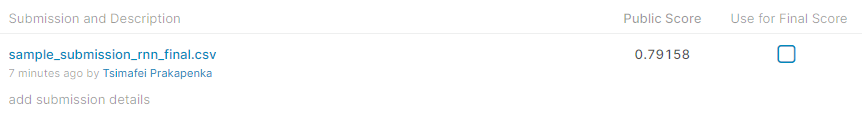

## 4) Модель на основе Universal Sentence Encoder.

In [0]:
%%capture
!pip3 install seaborn

In [0]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import os
import seaborn as sns

In [138]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [0]:
X_train['concat'] = X_train["positive"] + "# " + X_train["negative"]
X_test['concat'] = X_test["positive"] + "# " + X_test["negative"]

In [0]:
x_train_use, x_val_use, y_train_use, y_val_use = train_test_split(X_train.concat, labels, test_size=VALIDATION_SPLIT)

In [0]:
def embed_sentence(sent):
    sent_pos, sent_neg = sent.split('#')
    emb_pos = use([sent_pos])
    emb_neg = use([sent_neg])
    review_emb_pos = tf.reshape(emb_pos, [-1]).numpy()
    review_emb_neg = tf.reshape(emb_neg, [-1]).numpy()
    review_emb = np.concatenate((review_emb_pos, review_emb_neg))
    return review_emb

In [0]:
def embed_sentences(sents):
    embedded_sents = []
    counter = 0
    sents_len = len(sents)
    for sent in sents:
      review_emb = embed_sentence(sent)
      embedded_sents.append(review_emb)
      counter+=1
      print(f"{counter}/{sents_len}")

    embedded_sents = np.array(embedded_sents)
    return embedded_sents

In [453]:
sent = "No positive # The worst hotel"
res = embed_sentences([sent])
print(res.shape)

1/1
(1, 1024)


In [0]:
X_train_use = embed_sentences(x_train_use)

In [0]:
X_val_use = embed_sentences(x_val_use)

In [0]:
X_test_use = embed_sentences(X_test.concat)

In [433]:
print(X_train_use.shape, X_val_use.shape, X_test_use.shape)
print(y_train_use.shape, y_val_use.shape)

(80000, 1024) (20000, 1024) (20000, 1024)
(80000,) (20000,)


In [0]:
from tensorflow.keras.optimizers import RMSprop

def build_use_model(lr=0.001):
    model = tf.keras.Sequential()

    model.add(Dense(256, input_shape=(X_train_use.shape[1], ), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1))

    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(learning_rate=lr),
                  metrics=['MAE'])
    
    return model

In [442]:
use_model = build_use_model()
use_model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 256)               262400    
_________________________________________________________________
batch_normalization_118 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_115 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_174 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_119 (Bat (None, 128)               512       
_________________________________________________________________
dropout_116 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_175 (Dense)            (None, 1)               

In [443]:
use_cp_path = 'model_use.hdf5'
use_cp=ModelCheckpoint(use_cp_path, monitor='val_MAE', verbose=verbose, save_best_only=True)

import keras.backend as K
print(K.eval(use_model.optimizer.lr))

from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_MAE', 
                                            patience=5, 
                                            verbose=0, 
                                            factor=0.5, 
                                            min_lr=0.00005)

0.001


In [444]:
h_use = use_model.fit(
    X_train_use, y_train_use, 
    validation_data=(X_val_use, y_val_use),
    batch_size=batch_size,
    verbose=verbose, epochs=20,
    callbacks=[use_cp, learning_rate_reduction]
)

Epoch 1/20
614/625 [============================>.] - ETA: 0s - loss: 0.2260 - MAE: 0.2993
Epoch 00001: val_MAE improved from inf to 0.08587, saving model to model_use.hdf5
625/625 [==============================] - 3s 4ms/step - loss: 0.2224 - MAE: 0.2959 - val_loss: 0.0136 - val_MAE: 0.0859 - lr: 0.0010
Epoch 2/20
624/625 [============================>.] - ETA: 0s - loss: 0.0155 - MAE: 0.0946
Epoch 00002: val_MAE improved from 0.08587 to 0.08184, saving model to model_use.hdf5
625/625 [==============================] - 2s 4ms/step - loss: 0.0155 - MAE: 0.0945 - val_loss: 0.0123 - val_MAE: 0.0818 - lr: 0.0010
Epoch 3/20
616/625 [============================>.] - ETA: 0s - loss: 0.0125 - MAE: 0.0852
Epoch 00003: val_MAE improved from 0.08184 to 0.07479, saving model to model_use.hdf5
625/625 [==============================] - 2s 4ms/step - loss: 0.0125 - MAE: 0.0851 - val_loss: 0.0103 - val_MAE: 0.0748 - lr: 0.0010
Epoch 4/20
621/625 [============================>.] - ETA: 0s - loss: 0

In [0]:
use_model = load_model(use_cp_path)
predicted_scores_use_raw = use_model.predict(X_test_use)

In [447]:
predicted_scores_use_val = use_model.predict(X_val_use)
pr_proc = process_prediction_scores(predicted_scores_use_val)
print(pr_proc[:10])
print(y_val_use[:10])
print(len(pr_proc[pr_proc < 5]))
print(len(y_val_use[y_val_use < 0.5]))

print(mae(y_val_use, predicted_scores_use_val).numpy())

[ 9.78141785  5.9038347   7.02671707  9.25548673  8.86978745  8.48894894
  8.50233912  7.40167797  9.5947504  10.        ]
[0.88 0.75 0.79 0.83 0.83 0.75 0.92 0.67 1.   0.96]
554
920
0.07939211


In [0]:
sample_df = pd.read_csv(sample_path)
sample_df['score'] = process_prediction_scores(predicted_scores_use_raw)
submission_file_name = 'sample_submission_use.csv'
sample_df.to_csv(submission_file_name, index=False)

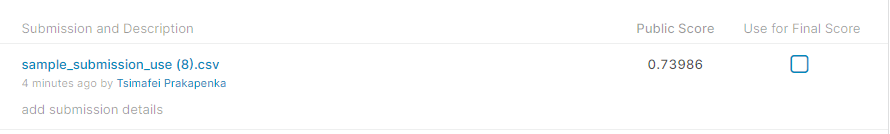